In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

Using TensorFlow backend.


1.14.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
60000
10000


Text(0.5, 1.0, 'image 3')

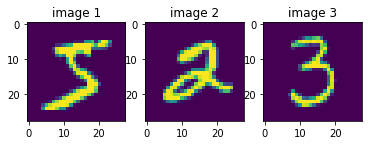

In [3]:
#ex1
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(test_labels)
print(len(train_labels))
print(len(test_labels))
#ex2, 4 labels : train_images, test_images, train_labels, test_labels
#ex2, images size and plot few examples
fig = plt.figure()

img = fig.add_subplot(1,3,1)
imgplot = plt.imshow(train_images[0])
img.set_title("image 1")

img = fig.add_subplot(1,3,2)
imgplot = plt.imshow(train_images[5])
img.set_title("image 2")

img = fig.add_subplot(1,3,3)
imgplot = plt.imshow(train_images[50])
img.set_title("image 3")

In [4]:
#TODO: reshape and transform the data

train_images = train_images.reshape(60000, 28 * 28).astype('float32') / 255
test_images = test_images.reshape(10000, 28 * 28).astype('float32') / 255
print(train_images.shape)

(60000, 784)


In [5]:
#network architecture
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
#TODO: fit the model
# Train the model
network.fit(train_images, train_labels, batch_size=128, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 22s 367us/step - loss: 0.2527 - accuracy: 0.9267
Epoch 2/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.1030 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0690 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.0502 - accuracy: 0.9850s - loss: 0.050
Epoch 5/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.0380 - accuracy: 0.9890


In [8]:
#network evaluation

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 2s 169us/step
test_acc: 0.9804999828338623
